In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import sys

def createHistogram(magBlock,angleBlock):
    # Function to create a histogram of gradients given an 8x8 block
    hist = np.zeros([9])
    angleBlock = np.mod(angleBlock,180) / 20
##    print(angleBlock)
##    print("")
##    print('len(angleBlock is ' + str(len(angleBlock)))
    
    for i in range(len(angleBlock)):
        for j in range(len(angleBlock[i])):
            angle = angleBlock[i,j]
            rem = angle%1
            left = int(np.floor(angle))
            if (angle < 8.0):
                right = int(np.ceil(angle))
            else:
                right = 0

##            if j == 2:
##                print('angle: '+ str(angle) + ' | rem: ' + 
##                      str(rem) + ' | left: ' + str(left) +
##                      ' | right: ' + str(right))

            hist[left] += (1-rem)*magBlock[i,j]
            hist[right] += rem*magBlock[i,j]

##    print('Hist is: ')
##    print(hist)

    return hist

In [5]:
magBlock = np.loadtxt(open("magBlock.csv","rb"), delimiter=",")
angleBlock = np.loadtxt(open("angleBlock.csv","rb"), delimiter=",")
angleBlock = np.mod(angleBlock,180) / 20
angle = angleBlock[2,0]
rem = angle%1
left = int(np.floor(angle))
if angle < 8.0:
    right = int(np.ceil(angle))
else:
    right = 0
    
print("Left index is: " + str(left) + 
      "| value in that bin is: " + str((1-rem)*magBlock[2,0]))
print("Right index is: " + str(right) + 
      "| Value in that bin is: " + str(rem*magBlock[2,0]))

angleBlock

Left index is: 4| value in that bin is: 7.15
Right index is: 5| Value in that bin is: 3.85


array([[ 4.  ,  1.8 ,  0.25,  0.5 ,  0.  ,  3.2 ,  4.5 ,  3.65],
       [ 1.85,  0.45,  0.45,  8.95,  3.9 ,  1.35,  8.45,  8.3 ],
       [ 4.35,  6.8 ,  8.65,  1.95,  5.1 ,  8.15,  7.6 ,  8.8 ],
       [ 3.8 ,  0.65,  0.05,  8.4 ,  7.95,  1.1 ,  6.25,  7.15],
       [ 6.  ,  3.5 ,  0.7 ,  7.5 ,  7.25,  7.2 ,  7.25,  7.15],
       [ 2.9 ,  4.3 ,  5.95,  4.9 ,  5.  ,  5.05,  6.65,  5.65],
       [ 1.5 ,  3.25,  7.85,  3.75,  3.9 ,  8.25,  7.25,  6.2 ],
       [ 0.55,  8.5 ,  4.55,  0.2 ,  5.5 ,  0.85,  6.65,  5.5 ]])

85.0
165.0


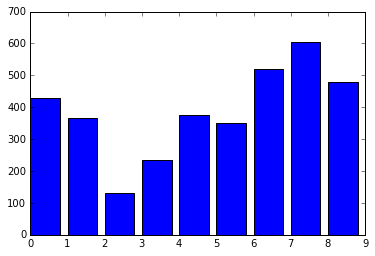

In [6]:
magBlock = np.loadtxt(open("magBlock.csv","rb"), delimiter=",")
angleBlock = np.loadtxt(open("angleBlock.csv","rb"), delimiter=",")
print(magBlock[6,5])
print(angleBlock[6,5])
hist = createHistogram(magBlock,angleBlock)          
x = np.arange(9)
plt.bar(x,hist)
plt.show()        

In [315]:
BLOCKSIZE = 8
HISTSIZE = 9
EPS = 0.0001
imgpath = "C:/Users/pmegson/Documents/openCVTutorial/HoG/tester.png"

img = cv2.imread(imgpath)
height, width = img.shape[0:2]
if width != 64 or height != 128:
    img = cv2.resize(img, (64,128))

img = np.float32(img) / 255.0
    
gx = cv2.Sobel(img,cv2.CV_32F,1,0,ksize=1)
gy = cv2.Sobel(img,cv2.CV_32F,0,1,ksize=1)

mag, angle =  cv2.cartToPolar(gx, gy, angleInDegrees=True)
# need to correct for color channels. According to the blog post, we select the maximum gradient
# on each pixel, and assign the corresponding direction.
newMag = mag[:,:,0]
newAng = angle[:,:,0]
argmat = np.argmax(mag,2)
for i in range(128):
    for j in range(64):
        newMag[i,j] = mag[i,j,argmat[i,j]]
        newAng[i,j] = angle[i,j,argmat[i,j]]
        
mag = newMag
angle = newAng

numBlocksX = int(64/BLOCKSIZE)
numBlocksY = int(128/BLOCKSIZE)

HistList = np.empty([numBlocksY,numBlocksX,HISTSIZE])

# Calculation of histograms step
for row in range(numBlocksY):
    for col in range(numBlocksX):
        magBlock = mag[row*BLOCKSIZE:(row+1)*BLOCKSIZE-1, col*BLOCKSIZE:(col+1)*BLOCKSIZE-1]
        angleBlock = angle[row*BLOCKSIZE:(row+1)*BLOCKSIZE-1, col*BLOCKSIZE:(col+1)*BLOCKSIZE-1]
        HistList[row,col,:] = createHistogram(magBlock,angleBlock)

# Normalization step
finalVector = np.array([])
for row in range(numBlocksY-1):
    for col in range(numBlocksX-1):
        bigHist = np.concatenate((HistList[row,col,:],HistList[row+1,col,:],
                                 HistList[row,col+1,:],HistList[row+1,col+1,:]))
        normHist = bigHist/np.sqrt(np.dot(bigHist,bigHist)+EPS)
        finalVector = np.concatenate((finalVector,normHist))

In [319]:
np.sum(finalVector == 0)

12

In [312]:
numBlocksY
jtest = 14
itest = 4
mag[itest*BLOCKSIZE:(itest+1)*BLOCKSIZE-1, jtest*BLOCKSIZE:(jtest+1)*BLOCKSIZE-1]

mag[itest,jtest*BLOCKSIZE]

IndexError: index 112 is out of bounds for axis 1 with size 64

In [279]:
a = np.array([1,2,3])
b = np.array([4,5,6])
ab = np.concatenate((a,b))
ab

array([1, 2, 3, 4, 5, 6])

In [151]:
(mag[:,:,0] == np.amax(mag,2)).shape

(128, 64)

In [222]:
level0 = np.array([[1,14,3,16],[5,18,7,20],[9,22,11,24]])
level1 = np.array([[13,2,15,4],[17,6,19,8],[21,10,23,12]])
full = np.array([level0,level1])

In [221]:
np.argmax(full,0)

array([[1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0]], dtype=int64)

In [227]:
test = np.argmax(full,0).reshape(1,12)


array([[[[13,  2, 15,  4],
         [17,  6, 19,  8],
         [21, 10, 23, 12]],

        [[ 1, 14,  3, 16],
         [ 5, 18,  7, 20],
         [ 9, 22, 11, 24]],

        [[13,  2, 15,  4],
         [17,  6, 19,  8],
         [21, 10, 23, 12]],

        [[ 1, 14,  3, 16],
         [ 5, 18,  7, 20],
         [ 9, 22, 11, 24]],

        [[13,  2, 15,  4],
         [17,  6, 19,  8],
         [21, 10, 23, 12]],

        [[ 1, 14,  3, 16],
         [ 5, 18,  7, 20],
         [ 9, 22, 11, 24]],

        [[13,  2, 15,  4],
         [17,  6, 19,  8],
         [21, 10, 23, 12]],

        [[ 1, 14,  3, 16],
         [ 5, 18,  7, 20],
         [ 9, 22, 11, 24]],

        [[13,  2, 15,  4],
         [17,  6, 19,  8],
         [21, 10, 23, 12]],

        [[ 1, 14,  3, 16],
         [ 5, 18,  7, 20],
         [ 9, 22, 11, 24]],

        [[13,  2, 15,  4],
         [17,  6, 19,  8],
         [21, 10, 23, 12]],

        [[ 1, 14,  3, 16],
         [ 5, 18,  7, 20],
         [ 9, 22, 11, 24]]]])

In [139]:
full[1,1,0]

9

In [143]:
full.shape

(2, 3, 4)

In [153]:
mask = []
mask = (a == np.amax(a,0))
print(str((np.max(a,0)).shape))
print(str(a.shape))
print(str(mask.shape))
print(a)
mask

(2, 3)
(2, 2, 3)
(2, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


array([[[False, False, False],
        [False, False, False]],

       [[ True,  True,  True],
        [ True,  True,  True]]], dtype=bool)